In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [4]:
from scipy.stats import binom

In [5]:
n = 10

In [6]:
A = np.random.randint(0,2,(100,100)).astype(int)

In [7]:
A

array([[1, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 1]])

In [8]:
M = np.bitwise_and(A,A[:,::-1]).sum()

In [9]:
def generate(A,n_):
    U = A.copy()
    U[U!=0] = np.random.randint(1,n_+1,(U[U!=0]).shape)
    return U

In [10]:
def s(X):
    total_matches = (X==X[:,::-1]).sum()
    n_ = int(X.max())
    V = X.copy()
    V[V!=0] = n_+1
    V[V==0] = 1
    V[V!=1] = 0
    zero_matches = np.bitwise_and(V,V[:,::-1]).sum()
    return total_matches - zero_matches

In [11]:
sample = np.array([s(generate(A,n)) for _ in tqdm(range(100000))])

100%|█████████████████████████████████| 100000/100000 [00:39<00:00, 2538.63it/s]


In [14]:
P = binom(M,1/n)

In [18]:
x = np.arange(175,350,1)

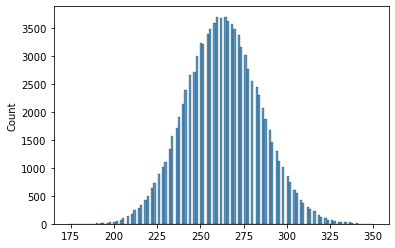

In [15]:
sns.histplot(sample)

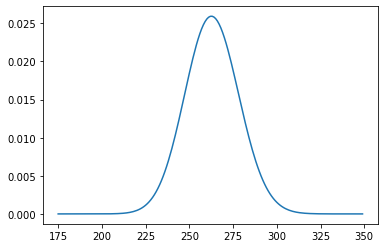

In [22]:
plt.plot(x,P.pmf(x))

In [23]:
P.expect()

262.9999999999998

In [12]:
sample.mean()

262.97004

In [13]:
M/n #Expected value

263.0

In [26]:
P.cdf(325-P.expect())

6.68660167925065e-54